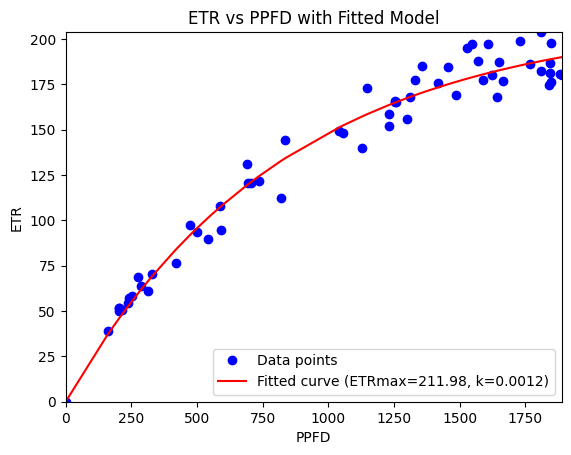

Goodness of fit metrics:
Residual Standard Error (RSE): 9.117523827155118
Pseudo R-squared: 0.9720151346724468
AIC: 271.6106657225957


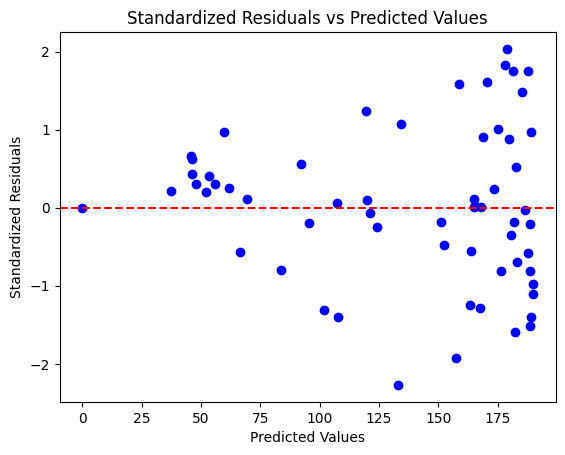

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from the uploaded file
file_path = 'data.csv'
curve_data = pd.read_csv(file_path)

# Add a data point at the origin (0, 0)
origin_point = pd.DataFrame({'PPFD': [0], 'ETR': [0]})
curve_data = pd.concat([curve_data, origin_point], ignore_index=True)

# Define the model to fit
def model(PPFD, ETRmax, k):
    return ETRmax * (1 - np.exp(-k * PPFD))

# Set initial values for the parameters
ETRmax_start = 150
k_start = 0.0015

# Fit the model using non-linear least squares
popt, pcov = curve_fit(model, curve_data['PPFD'], curve_data['ETR'], p0=[ETRmax_start, k_start])
ETRmax_fit, k_fit = popt

# Generate fitted values
curve_data['ETR_fitted'] = model(curve_data['PPFD'], ETRmax_fit, k_fit)

# Sort the data by PPFD values in increasing order
curve_data = curve_data.sort_values(by='PPFD').reset_index(drop=True)

# Plot the original data as points and the fitted curve
plt.plot(curve_data['PPFD'], curve_data['ETR'], 'o', color='blue', label='Data points')
plt.plot(curve_data['PPFD'], curve_data['ETR_fitted'], color='red', label=f'Fitted curve (ETRmax={ETRmax_fit:.2f}, k={k_fit:.4f})')

# Label the plot
plt.xlabel('PPFD')
plt.ylabel('ETR')
plt.title('ETR vs PPFD with Fitted Model')
plt.xlim(0, max(curve_data['PPFD']))
plt.ylim(0, max(curve_data['ETR']))
plt.legend()
plt.show()

# Calculate residuals
residuals = curve_data['ETR'] - curve_data['ETR_fitted']

# Calculate Residual Standard Error (RSE)
rss = np.sum(residuals**2)
n = len(curve_data)
p = len(popt)
rse = np.sqrt(rss / (n - p))

# Calculate R-squared (pseudo R-squared)
tss = np.sum((curve_data['ETR'] - np.mean(curve_data['ETR']))**2)
r_squared = 1 - (rss / tss)

# Calculate AIC (Akaike Information Criterion)
aic = 2 * p + n * np.log(rss / n)

# Output the goodness of fit metrics
print(f"Goodness of fit metrics:\nResidual Standard Error (RSE): {rse}\nPseudo R-squared: {r_squared}\nAIC: {aic}")

# Standardize the residuals
standardized_residuals = residuals / rse

# Plot the standardized residuals vs predicted values
plt.scatter(curve_data['ETR_fitted'], standardized_residuals, color='blue')
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Predicted Values')
plt.show()
